### Plotting decadal trends for surface radiative fluxes

- This notebook shows how the plots of the surface radiative flux monthly trends were created
- The data is imported. The data was gathered using the net_monthly_average.py and cloud_forcing.py scripts.
- Then it is plotted on regional maps to show trends.

- To use this notebook, one must replace the paths to the surface flux and cloud forcing data, which have been generated by the scripts mentioned above

In [3]:
# EASE grid lon and lat coordinates imported

import xarray as xr

EASE_data = xr.open_dataset('/Users/farrerowsleybrown/Desktop/project/code/grids/EASE_grid.nc')
EASE_lon, EASE_lat = EASE_data.lon.data, EASE_data.lat.data

In [12]:
# The monthly mean of the radiative fluxes for each year is imported
# The monthly mean nc files (one for each year) were made by the net_monthly_average.py script

import os
import glob

os.chdir("/Users/farrerowsleybrown/Desktop/project/code/chapter1-radiativefluxtrends/decade_changes/flux_data")
files = sorted(glob.glob('monthly_averages_*.nc'))
data = xr.open_mfdataset(files, concat_dim='year', combine='nested')

albedo_data = data.albedo.load()
swd_data = data.swd.load()
lwu_data = data.lwu.load()
lwd_data = data.lwd.load()
data.close()

In [5]:
# Import the monthly mean for cloud radiative forcing, created by the cloud_forcing.py script

os.chdir("/Users/farrerowsleybrown/Desktop/project/code/chapter1-radiativefluxtrends/decade_changes/cloud_data")
files = sorted(glob.glob('*.nc'))
data = xr.open_mfdataset(files, concat_dim='year', combine='nested')

cloud_long = data.cloud_long.load()
data.close()

In [6]:
# Function that returns data for plotting

import numpy as np

def plot_data(month, flux):
    ''' Input the month (number) and flux (e.g. cloud_long, albedo) to plot
    Returns a decadal linear trends for each grid cell using numpy polyfit
    '''
    ds = flux.sel({'month' : month})
    ds = ds.dropna('year')
    vals = ds.data
    years = ds.year.data
    
    vals2 = vals.reshape(len(years), -1)
    regressions = np.polyfit(years, vals2, 1)
    trends = regressions[0,:].reshape(vals.shape[1], vals.shape[2])
    trends = trends*10
    trends = np.where(trends>10, 10, trends)
    trends = np.where(trends<-10, -10, trends)
    
    return trends

In [9]:
# Plots use the cartopy package and plot on a Lambert azimuthal equal area projection with a circular boundary

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import calendar
%matplotlib inline

# For plotting circular boundary on the map plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

projection = ccrs.LambertAzimuthalEqualArea(central_latitude=90)



/Users/farrerowsleybrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


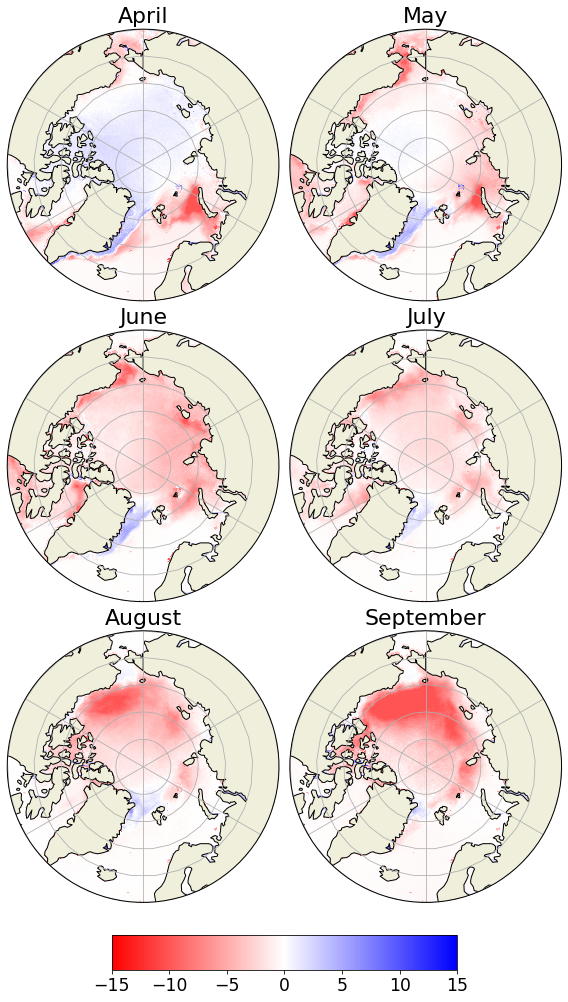

In [29]:
# First plot: the decadal albedo trends

fig = plt.figure(figsize=(8, 14))

columns = 2
rows = 3

# Loop through the subplots for each month
j=0
for i in range(1, columns*rows +1):
    # add a subplot into the array of plots
    ax = fig.add_subplot(rows, columns, i, projection=projection)
    
    ax.gridlines()
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_title(calendar.month_name[j+4], fontsize=22)
    ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
    
    cs = ax.pcolormesh(EASE_lon, EASE_lat, plot_data(j+4,albedo_data*100), abs# *100 to convert into %
                       transform=ccrs.PlateCarree(),
                       vmin=-15,vmax=15,
                       cmap='bwr_r')
    j=j+1


fig.subplots_adjust(top=1, bottom=0.15, left=0.3, right=1, hspace=0.15, wspace=0.25)

cbar_ax = fig.add_axes([0.2, 0, 0.6, 0.035])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize='xx-large')

plt.gcf().subplots_adjust(bottom=0.05)
fig.tight_layout(h_pad = 0.5, rect=[0,0,1,1])

plt.show()

/Users/farrerowsleybrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


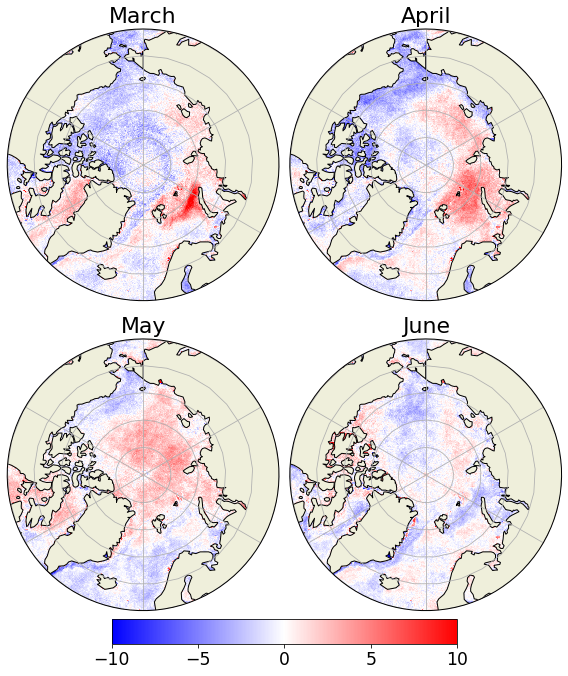

In [23]:
# Plot for the monthly-mean spring longwave cloud forcing

fig = plt.figure(figsize=(8, 10))

columns = 2
rows = 2

j=0
for i in range(1, columns*rows +1):
    # add a subplot into the array of plots
    ax = fig.add_subplot(rows, columns, i, projection=projection)
    
    ax.gridlines()
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_title(calendar.month_name[j+3], fontsize=22)
    ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
    
    cs = ax.pcolormesh(EASE_lon, EASE_lat, plot_data(j+3,cloud_long),
                       transform=ccrs.PlateCarree(),
                       vmin = -10, vmax=10,
                       cmap='bwr')
    j=j+1


fig.subplots_adjust(top=1, bottom=0.15, left=0.3, right=1, hspace=0.15, wspace=0.25)

cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.035])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize='xx-large')


fig.tight_layout(h_pad = 0.5, rect=[0,0,1,1])

plt.show()
